# Machine Learning Final Project

Rohit Anantha, Dhruv Arora, Jessica Ouyang, Anushka Shah

## Our Goal

Predict whether or not drunk drivers were involved in the fatal accident using other features, such as time of accident, light conditions, response and arrival times, type of road, and more.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import square, sqrt
from pandas import DataFrame
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import pickle

## Data Exploration

In [2]:
accident2021 = pd.read_csv("accident2021.csv")
accident2021.head()

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
0,1,Alabama,10001,0,0,2,2,0,3,3,...,13,22,10:00pm-10:59pm,25,25,23,11:00pm-11:59pm,2,2,2
1,1,Alabama,10002,0,0,1,1,0,2,2,...,Unknown,19,7:00pm-7:59pm,9,9,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),2
2,1,Alabama,10003,1,1,1,1,0,1,1,...,29,9,9:00am-9:59am,40,40,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
3,1,Alabama,10004,0,0,1,1,0,1,1,...,20,16,4:00pm-4:59pm,28,28,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
4,1,Alabama,10005,0,0,2,2,0,4,4,...,20,22,10:00pm-10:59pm,30,30,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1


In [3]:
accident2021.columns

# Note: each 'feature' is represented twice per record
# For instance: STATE and STATENAME represent the same data, once as a number code and once as a string

Index(['STATE', 'STATENAME', 'ST_CASE', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL',
       'VE_FORMS', 'PVH_INVL', 'PERSONS', 'PERMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'MONTH', 'MONTHNAME', 'DAY', 'DAYNAME', 'DAY_WEEK',
       'DAY_WEEKNAME', 'YEAR', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'TWAY_ID', 'TWAY_ID2', 'ROUTE', 'ROUTENAME', 'RUR_URB', 'RUR_URBNAME',
       'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER', 'RD_OWNERNAME', 'NHS',
       'NHSNAME', 'SP_JUR', 'SP_JURNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE',
       'LATITUDENAME', 'LONGITUD', 'LONGITUDNAME', 'HARM_EV', 'HARM_EVNAME',
       'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2',
       'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'REL_ROAD', 'REL_ROADNAME',
       'WRK_ZONE', 'WRK_ZONENAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT_MIN', 'NOT_MINNAME', 'ARR_HOUR', 'ARR_HOURNAME',
       'ARR_M

In [4]:
person2021 = pd.read_csv("person2021.csv")
person2021.head()

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,STATE,STATENAME,ST_CASE,VEH_NO,PER_NO,VE_FORMS,COUNTY,MONTH,MONTHNAME,DAY,...,EMER_USE,EMER_USENAME,ROLLOVER,ROLLOVERNAME,IMPACT1,IMPACT1NAME,FIRE_EXP,FIRE_EXPNAME,MAK_MOD,MAK_MODNAME
0,1,Alabama,10001,1,1,2,115,2,February,12,...,0.0,Not Applicable,0.0,No Rollover,12.0,12 Clock Point,0.0,No or Not Reported,2407.0,Jeep / Kaiser-Jeep / Willys- Jeep Patriot
1,1,Alabama,10001,1,2,2,115,2,February,12,...,0.0,Not Applicable,0.0,No Rollover,12.0,12 Clock Point,0.0,No or Not Reported,2407.0,Jeep / Kaiser-Jeep / Willys- Jeep Patriot
2,1,Alabama,10001,2,1,2,115,2,February,12,...,0.0,Not Applicable,0.0,No Rollover,12.0,12 Clock Point,0.0,No or Not Reported,51404.0,Volvo XC60 (For 2019 on. For model years 2008...
3,1,Alabama,10002,1,1,1,73,2,February,11,...,0.0,Not Applicable,0.0,No Rollover,11.0,11 Clock Point,0.0,No or Not Reported,59031.0,Lexus ES-250/300/300h/330/ 350
4,1,Alabama,10002,1,2,1,73,2,February,11,...,0.0,Not Applicable,0.0,No Rollover,11.0,11 Clock Point,0.0,No or Not Reported,59031.0,Lexus ES-250/300/300h/330/ 350


In [5]:
# Note: ALC_RES is the BAC results, anything above .08 is drunk, and vals above 940 are used as invalid codes

# find the ST_CASE vals for each drunk driving accident
fatal_accidents_drunk_inv = person2021[person2021['ALC_RES'].between(8, 940)]['ST_CASE'].unique()

# extract all accident records containing a drunk driver
drunk_acc = accident2021[accident2021['ST_CASE'].isin(fatal_accidents_drunk_inv)]

print('% of fatal accidents involving a drunk driver:', fatal_accidents_drunk_inv.shape[0] / accident2021.shape[0])
print('# of fatal accidents involving a drunk driver:', fatal_accidents_drunk_inv.shape)
print('Total # of fatal accidents:', accident2021.shape[0])

% of fatal accidents involving a drunk driver: 0.2502784246228612
# of fatal accidents involving a drunk driver: (9888,)
Total # of fatal accidents: 39508


> We noticed during our exploration of the data that only 25% of the records in our dataset have drunk drivers involved. This is a significant class imbalance, which is why we have decided to use SMOTE later on in order to mitigate this problem.

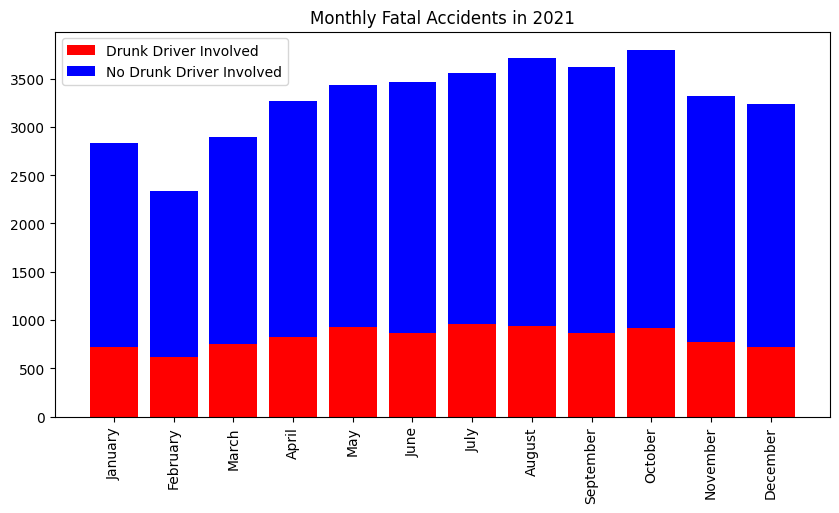

In [6]:
# get the unique months from the data set
months = accident2021['MONTHNAME'].unique() # names - to display nicely
months_idx = accident2021['MONTH'].unique() # indicies - to preserve order

# num of fatal accidents per month
monthly_fatals = [accident2021[accident2021['MONTHNAME'] == month].shape[0] for month in months]
# num of records with drunk drivers per month
monthly_fatals_drunk = [drunk_acc[drunk_acc['MONTHNAME'] == month].shape[0] for month in months]

# sort everything by month
names = [x for _, x in sorted(zip(months_idx, months))]
monthly_fatals = [x for _, x in sorted(zip(months_idx, monthly_fatals))]
monthly_fatals_drunk = [x for _, x in sorted(zip(months_idx, monthly_fatals_drunk))]

# avoid double counting drunk driving records
monthly_fatals_not_drunk = [total - drunk for total, drunk in zip(monthly_fatals, monthly_fatals_drunk)]

fig = plt.figure(figsize=(10, 5))

plt.bar(names, monthly_fatals_drunk, color = 'r')
plt.bar(names, monthly_fatals_not_drunk, bottom=monthly_fatals_drunk, color = 'b')
plt.xticks(range(len(months)), names, rotation='vertical')
plt.legend(['Drunk Driver Involved', 'No Drunk Driver Involved'])
plt.title("Monthly Fatal Accidents in 2021")
plt.show()

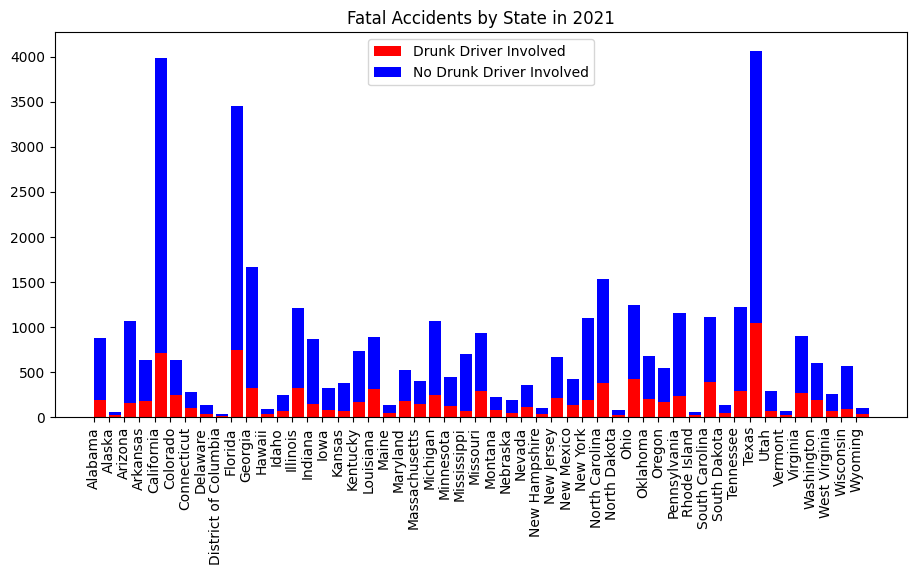

In [7]:
# frequency of accidents by state

states = accident2021['STATENAME'].unique()
states_idx = accident2021['STATE'].unique()

# num of records associated with each state
state_fatals = [accident2021[accident2021['STATENAME'] == state].shape[0] for state in states]

# num of records with drunk drivers per state
state_fatals_drunk = [drunk_acc[drunk_acc['STATENAME'] == state].shape[0] for state in states]

# sort everything by month
names = [x for _, x in sorted(zip(states_idx, states))]
state_fatals = [x for _, x in sorted(zip(states_idx, state_fatals))]
state_fatals_drunk = [x for _, x in sorted(zip(states_idx, state_fatals_drunk))]

# avoid double counting drunk driver records
state_fatals_not_drunk = [total - drunk for total, drunk in zip(state_fatals, state_fatals_drunk)]

fig = plt.figure(figsize=(11, 5))

plt.bar(names, state_fatals_drunk, align='edge', color = 'r')
plt.bar(names, state_fatals_not_drunk, bottom=state_fatals_drunk, color = 'b', align='edge')
plt.legend(['Drunk Driver Involved', 'No Drunk Driver Involved'])
plt.title("Fatal Accidents by State in 2021")
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

> After exploring more about the percentage of fatal accidents that involved drunk drivers by state, we noticed that because certain states have much higher populations than others, it would be useful to compare these proportions while also considering population. We decided to estimate state population using 2020 census data.

In [8]:
# retrieved from the https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html#v2021
state_pop = [5039877,732673,7276316,3025891,39237836,5812069,3605597,1003384,670050,21781128,10799566,1441553,1900923,12671469,6805985,3193079,2934582,4509394,4624047,1372247,6165129,6984723,10050811,5707390,2949965,6168187,1104271,1963692,3143991,1388992,9267130,2115877,19835913,10551162,774948,11780017,3986639,4246155,12964056,1095610,5190705,895376,6975218,29527941,3337975,645570,8642274,7738692,1782959,5895908,578803]

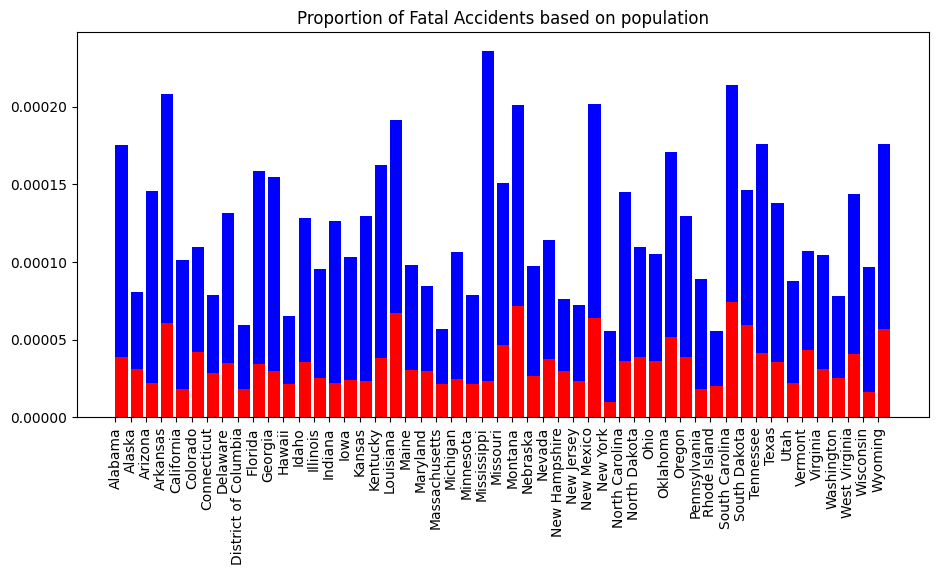

In [9]:
# normalize vals by dividing out each population count 
state_normalized_drunk = [count / pop for count, pop in zip(state_fatals_drunk, state_pop)]
state_normalized_not_drunk = [count / pop for count, pop in zip(state_fatals_not_drunk, state_pop)]

fig = plt.figure(figsize=(11, 5))

plt.bar(names, state_normalized_drunk, align='edge', color = 'r')
plt.bar(names, state_normalized_not_drunk, bottom=state_normalized_drunk, color = 'b', align='edge')
plt.xticks(range(len(names)), names, rotation='vertical')
plt.title('Proportion of Fatal Accidents based on population')
plt.show()

> Something interesting we observed in the above graph was that despite states like Texas and California having high frequencies of accidents in the first bar chart, the proportion of accidents based on population was not nearly as high as some of the other states, like Mississippi and South Carolina.

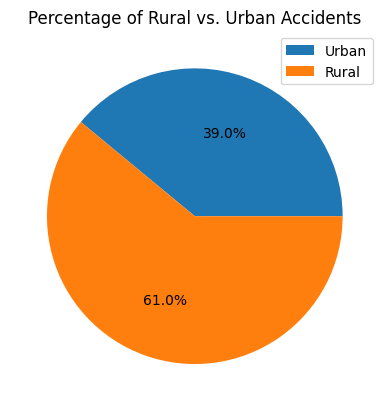

In [10]:
# data distributed between accidents in rural vs. urban areas

rur_urb = accident2021.groupby('RUR_URBNAME').size()
rur_urb = rur_urb[['Rural', 'Urban']]
plt.pie(rur_urb, autopct='%1.1f%%')
plt.title('Percentage of Rural vs. Urban Accidents')
labels = {'Rural','Urban'}
plt.legend(labels)
plt.show()

> Based on the pie chart above, it is clear that a majority of accidents tend to occur in urban environments. This is something that we expected to see in the data due to population density.

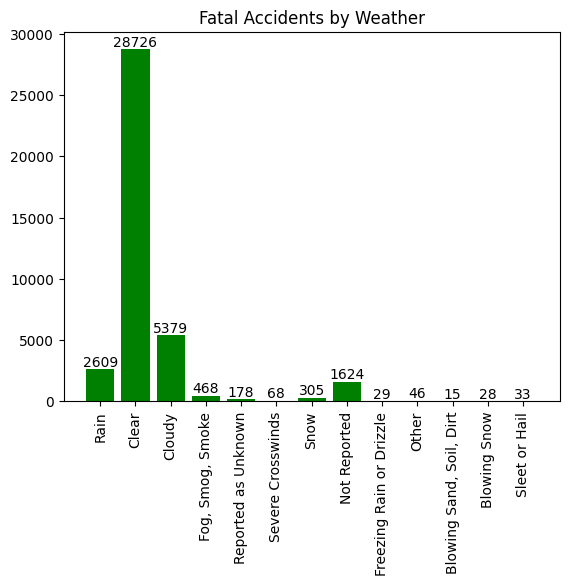

In [11]:
# graph of accidents by weather

weather_types = accident2021['WEATHERNAME'].unique() # names - to display nicely
weather = accident2021['WEATHER'].unique() # indicies - to preserve order

# num of accidents for each type of weather condition
acc_by_weather = [accident2021[accident2021['WEATHERNAME'] == weather_type].shape[0] for weather_type in weather_types]

fig, ax = plt.subplots()
hbar = ax.bar(weather_types, acc_by_weather, color = 'g')
ax.set_xticks(range(len(weather_types)), weather_types, rotation='vertical')
ax.bar_label(hbar)
ax.set_title('Fatal Accidents by Weather')
plt.show()

> This is a trend that we expected to see, as most days are just clear, and it is unlikely that weather events like smog, hail, and blowing sand would be taking place often.

## Data Cleaning

In [12]:
# figure out if there are nulls and what to do with them

accident2021.isnull().sum().sum()
accident2021.isnull().sum()[accident2021.isnull().sum() > 0]

TWAY_ID2    29859
dtype: int64

> Only TWAY_ID2 has nulls, and that is because only has values if it is a crash at an intersection. We determined this was an unnecessary column, and dropped it from our consideration.

In [13]:
accident2021.drop(columns=['TWAY_ID2'], inplace=True)

> Because we are trying to predict whether or not a drunk driver was involved in the fatal accident, we have determined that the following columns will be dropped from the data set to reduce dimensionality: 

- Columns that are essentially a repeat, with a name

- TWAY_ID2 - specifically for intersection crashes

- LATITUDE, LONGITUDE

- DAY - we deemed the day unnecessary, but the month could still be important as holiday / weather / weekends could have an impact

> At this point, we have manually reduced the number of features from 79 to 45.

In [14]:
cleaned = accident2021.drop(columns=[
    'MONTHNAME',
    'DAYNAME',
    'DAY_WEEKNAME',
    'HOURNAME',
    'MINUTENAME',
    'ROUTENAME', 
    'RUR_URBNAME',
    'RD_OWNERNAME',
    'LATITUDENAME',
    'LONGITUDNAME',
    'HARM_EVNAME',
    'MAN_COLLNAME',
    'RELJCT1NAME',
    'RELJCT2NAME',
    'TYP_INTNAME',
    'TYP_INTNAME',
    'REL_ROADNAME',
    'WRK_ZONENAME',
    'LGT_CONDNAME',
    'WEATHERNAME',
    'SCH_BUSNAME',
    'RAILNAME',
    'NOT_HOURNAME',
    'NOT_MINNAME',
    'ARR_HOURNAME',
    'ARR_MINNAME',
    'HOSP_HRNAME',
    'HOSP_MNNAME'
    ])
cleaned = cleaned.drop(columns=[
    'LATITUDE',
    'LONGITUD',
    'DAY',
    'NOT_HOUR',
    'NOT_MIN',
    'ARR_HOUR',
    'ARR_MIN'
])

print('Num cols before:', accident2021.shape[1])
print('Num cols after:', cleaned.shape[1])

Num cols before: 79
Num cols after: 45


In [15]:
print(cleaned.columns, cleaned.shape)

Index(['STATE', 'STATENAME', 'ST_CASE', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL',
       'VE_FORMS', 'PVH_INVL', 'PERSONS', 'PERMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'MONTH', 'DAY_WEEK', 'YEAR', 'HOUR', 'MINUTE',
       'TWAY_ID', 'ROUTE', 'RUR_URB', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'NHS', 'NHSNAME', 'SP_JUR', 'SP_JURNAME', 'MILEPT', 'MILEPTNAME',
       'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2', 'TYP_INT', 'REL_ROAD',
       'WRK_ZONE', 'LGT_COND', 'WEATHER', 'SCH_BUS', 'RAIL', 'HOSP_HR',
       'HOSP_MN', 'FATALS'],
      dtype='object') (39508, 45)


> Before we begin feature engineering, we wanted to ensure that we did not have any outliers in our dataset. We have created a box plot to determine which records were outliers. 

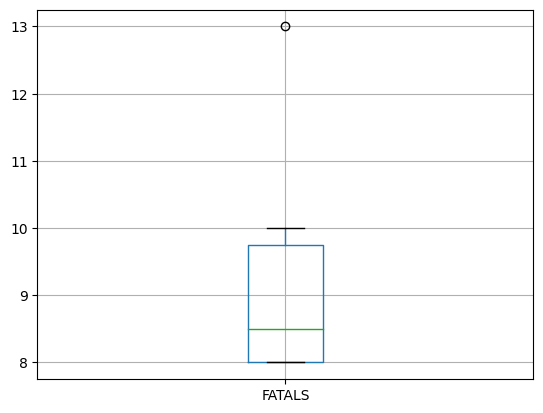

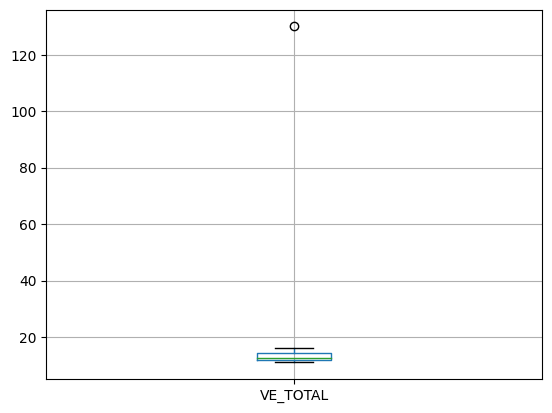

In [16]:

fatals = cleaned[cleaned['FATALS'] > 6]
fatals.boxplot(column='FATALS')
plt.show()

num_vehicles = cleaned[cleaned['VE_TOTAL'] > 10]
num_vehicles.boxplot(column='VE_TOTAL')
plt.show()

> After examining our boxplots, it is clear that there each plot has one outlier that is very far from the upper bound of the boxplot. For this reason, we have decided to drop both of those records.

In [17]:
cleaned[cleaned['FATALS'] == 13]

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,TYP_INT,REL_ROAD,WRK_ZONE,LGT_COND,WEATHER,SCH_BUS,RAIL,HOSP_HR,HOSP_MN,FATALS
6427,6,California,63834,0,0,2,2,0,26,26,...,2,1,0,1,1,0,0000000,99,99,13


In [18]:
cleaned[cleaned['VE_TOTAL'] == 130]

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,TYP_INT,REL_ROAD,WRK_ZONE,LGT_COND,WEATHER,SCH_BUS,RAIL,HOSP_HR,HOSP_MN,FATALS
33172,48,Texas,480549,2,2,130,130,0,133,133,...,1,1,0,3,98,0,0000000,99,99,6


In [19]:
# drop both of these records
drop_rows = cleaned[(cleaned['FATALS'] >= 13) & (cleaned['VE_TOTAL'] >= 130)].index
cleaned.drop(drop_rows, inplace=True)
print(cleaned.shape)

(39508, 45)


## Feature Engineering

> During our exploration of the data, we determined certain features to be more relevant than others to our question of drunk driving involvement. These features include the following:

- PERMVIT: number of persons in motor vehicles in transport

- FUNC_SYS: functional system

- MAN_COLL: manner of collision

- REL_ROAD: relation to trafficway

- LGT_COND: light condition

- RUR_URB: land use, rural and urban

- WEATHER: atmospheric conditions

- FATALS: fatalities

> One feature in our data set that was not explicitly there before was a true/false value of whether or not a drunk driver was involved, because of the way our source separated information into separate csv files based on accident and person. We decided to create a feature that would make it more convenient to build models and make predictions from the data.

In [20]:
# DRUNK_INV refers to if there was a drunk driver involved in the accident
cleaned['DRUNK_INV'] = np.where(cleaned['ST_CASE'].isin(fatal_accidents_drunk_inv), True, False)

# double check that it assigned values correctly: dataset is approx: 10k drunk, 30k not drunk
print('# of accidents with drunk drivers', cleaned[cleaned['DRUNK_INV']].shape[0])

# of accidents with drunk drivers 9888


In [21]:
cleaned

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,REL_ROAD,WRK_ZONE,LGT_COND,WEATHER,SCH_BUS,RAIL,HOSP_HR,HOSP_MN,FATALS,DRUNK_INV
0,1,Alabama,10001,0,0,2,2,0,3,3,...,1,0,2,2,0,0000000,23,2,2,False
1,1,Alabama,10002,0,0,1,1,0,2,2,...,3,0,2,2,0,0000000,88,88,2,False
2,1,Alabama,10003,1,1,1,1,0,1,1,...,2,0,2,2,0,0000000,88,88,1,False
3,1,Alabama,10004,0,0,1,1,0,1,1,...,4,0,1,1,0,0000000,99,99,1,False
4,1,Alabama,10005,0,0,2,2,0,4,4,...,1,0,2,10,0,0000000,88,88,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39503,56,Wyoming,560100,0,0,1,1,0,2,2,...,4,0,1,1,0,0000000,88,88,1,True
39504,56,Wyoming,560101,0,0,2,2,0,2,2,...,1,0,2,1,0,0000000,19,28,1,False
39505,56,Wyoming,560102,0,0,1,1,0,1,1,...,4,0,1,1,0,0000000,88,88,1,False
39506,56,Wyoming,560103,1,1,1,1,0,1,1,...,1,0,2,1,0,0000000,88,88,1,False


In [22]:
# separate the labels from the rest of the dataset
labels = cleaned.loc[:, 'DRUNK_INV']

# pick out the features we found most valuable as discussed earlier above
features = accident2021[['PERMVIT', 'FUNC_SYSNAME', 'MAN_COLLNAME', 'REL_ROADNAME', 'LGT_CONDNAME', 'WEATHERNAME', 'FATALS', 'RUR_URBNAME']]

> Looking into the data, we considered the possibility that it may be necessary to one-hot encode features that contain categorical values. However, when one-hot encoding all categorical features we deemed relevant, it took us from 8 features to 96, which may be too sparse to build a valid model. Instead, we decided that we would use aggregation to place multiple distinct but similar values into a single group to reduce dimensionality.

In [23]:
# one hot encode our categorical values
enc = OneHotEncoder(drop='first')
enc.fit(features)
onehot = enc.transform(features)

print('# cols before:', features.shape[1])
print('# cols after:', onehot.shape[1])

# cols before: 8
# cols after: 96


> As seen above, one hot encoding results in 96 columns which makes our data far too sparse. Instead, we decided to manually "aggregate" some of the categories to reduce the total number of columns. First, we combined attributes such as "Not Reported," "Unknown," and "Other" into a single column, as they represent similar levels of uncertainty in our data. We then applied this logic to more specific scenarios depending on the feature, reducing the number of columns we had to work with. This was especially helpful since many of the values are so similar that it isn't worth differentiation between them.

In [24]:
# FUNC_SYS
# {Not Reported, Unknown, Trafficway Not in State Inventory}, {Major Collector, Minor Collector}, {Minor Arterial, Principal Arterial - Other, Principal Arterial - Other Freeways and Expressways}, {Interstate}, {Local}
conditions = [
    # {Not Reported, Unknown, Trafficway Not in State Inventory}
    ((accident2021['FUNC_SYSNAME'] == 'Not Reported') | (accident2021['FUNC_SYSNAME'] == 'Unknown') | (accident2021['FUNC_SYSNAME'] == 'Trafficway Not in State Inventory')),
    # {Major Collector, Minor Collector}
    ((accident2021['FUNC_SYSNAME'] == 'Major Collector') | (accident2021['FUNC_SYSNAME'] == 'Minor Collector')),
    # {Minor Arterial, Principal Arterial - Other, Principal Arterial - Other Freeways and Expressways}
    ((accident2021['FUNC_SYSNAME'] == 'Minor Arterial') | (accident2021['FUNC_SYSNAME'] == 'Principal Arterial - Other') | (accident2021['FUNC_SYSNAME'] == 'Principal Arterial - Other Freeways and Expressways')),
    # {Interstate}
    (accident2021['FUNC_SYSNAME'] == 'Interstate'),
    # {Local}    
    (accident2021['FUNC_SYSNAME'] == 'Local')
]

values = ['Unknown' , 'Collector', 'Arterial', 'Interstate', 'Local']

accident2021['FUNC_SYSGROUP'] = np.select(conditions, values)
accident2021['FUNC_SYSGROUP'].value_counts(ascending=True)

Unknown         237
Local          4398
Interstate     5027
Collector      7634
Arterial      22212
Name: FUNC_SYSGROUP, dtype: int64

In [25]:
# MAN_COLL
# {Other, Not Reported, Reported as Unknown}, {The First Harmful Event was Not a Collision...}, {Sideswipe - Opposite, Sideswipe - Same}, {Angle}, {Front-to-Front}, {Front-to-Rear}, {Rear-to-Rear}, {Rear-to-Side}

conditions = [
    # {Other, Not Reported, Reported as Unknown}
    ((accident2021['MAN_COLLNAME'] == "Other") | (accident2021['MAN_COLLNAME'] == "Not Reported") | (accident2021['MAN_COLLNAME'] == "Reported as Unknown")),
    # {Sideswipe - Opposite, Sideswipe - Same}
    ((accident2021['MAN_COLLNAME'] == "Sideswipe - Opposite Direction") | (accident2021['MAN_COLLNAME'] == "Sideswipe - Same Direction")),
    # {The First Harmful Event was Not a Collision...}
    ((accident2021['MAN_COLLNAME'] == "The First Harmful Event was Not a Collision with a Motor Vehicle in Transport")),
    # {Angle}
    ((accident2021['MAN_COLLNAME'] == "Angle")),
    # {Front-to-Front}
    ((accident2021['MAN_COLLNAME'] == "Front-to-Front")),
    # {Front-to-Rear}
    ((accident2021['MAN_COLLNAME'] == "Front-to-Rear")),
    # {Rear-to-Rear}
    ((accident2021['MAN_COLLNAME'] == "Rear-to-Rear")),
    # {Rear-to-Side}
    ((accident2021['MAN_COLLNAME'] == "Rear-to-Side"))
]

values = ['Unknown', 'Sideswipe', 'Non-motor', "Angle", "Front-to-Front", "Front-to-Rear", "Rear-to-Rear", "Rear-to-Side"]

accident2021['MAN_COLLGROUP'] = np.select(conditions, values)
accident2021['MAN_COLLGROUP'].value_counts(ascending=True)


Rear-to-Rear          1
Rear-to-Side         40
Unknown             209
Sideswipe          1184
Front-to-Rear      2949
Front-to-Front     4295
Angle              7183
Non-motor         23647
Name: MAN_COLLGROUP, dtype: int64

In [26]:
# REL_ROAD
# {Not Reported, Reported as Unknown, Off Roadway - Location Unknown}, {Gore, On Median, Separator, Pedestrian Refuge Island or Traffic Island}, {On Roadside, On Shoulder, Outside Trafficway}, {On Roadway}, {Continuous Left - Turn Lane}, {In Parking Lane/Zone}

conditions = [
    # {Not Reported, Reported as Unknown, Off Roadway - Location Unknown}
    ((accident2021['REL_ROADNAME'] == 'Not Reported') | (accident2021['REL_ROADNAME'] == 'Reported as Unknown') | (accident2021['REL_ROADNAME'] == 'Off Roadway-Location Unknown')),
    # {Gore, On Median, Separator, Pedestrian Refuge Island or Traffic Island}
    ((accident2021['REL_ROADNAME'] == 'Gore') | (accident2021['REL_ROADNAME'] == 'On Median') | (accident2021['REL_ROADNAME'] == 'Separator') | (accident2021['REL_ROADNAME'] == 'Pedestrian Refuge Island or Traffic Island')),
    # {On Roadside, On Shoulder, Outside Trafficway}
    ((accident2021['REL_ROADNAME'] == 'On Roadside') | (accident2021['REL_ROADNAME'] == 'On Shoulder') | (accident2021['REL_ROADNAME'] == 'Outside Trafficway')),
    # {On Roadway}
    (accident2021['REL_ROADNAME'] == 'On Roadway'),
    # {Continuous Left - Turn Lane}
    (accident2021['REL_ROADNAME'] == 'Continuous Left - Turn Lane'),
    # {In Parking Lane/Zone}
    (accident2021['REL_ROADNAME'] == 'In Parking Lane/Zone')
]

values = ['Unknown', 'On Median', 'On Roadside', 'On Roadway', 'Continuous Left - Turn Lane', 'In Parking Lane/Zone']

accident2021['REL_ROADGROUP'] = np.select(conditions, values)
accident2021[['REL_ROADGROUP']].value_counts(ascending=True)

REL_ROADGROUP              
Continuous Left - Turn Lane       25
In Parking Lane/Zone             123
Unknown                          232
On Median                       1908
On Roadside                    12359
On Roadway                     24861
dtype: int64

In [27]:
# LGT_COND
# {Not Reported, Other, Reported as Unknown}, {Dawn, Dusk}, {Daylight}, {Dark - Not Lighted, Dark - Unknown lighting}, {Dark - Lighted}
conditions = [
    # {Not Reported, Other, Reported as Unknown}, 
    ((accident2021['LGT_CONDNAME'] == 'Not Reported') | (accident2021['LGT_CONDNAME'] == 'Reported as Unknown') | (accident2021['LGT_CONDNAME'] == 'Other')),
    # {Dawn, Dusk}
    ((accident2021['LGT_CONDNAME'] == 'Dawn') | (accident2021['LGT_CONDNAME'] == 'Dusk')),
    # {Daylight}
    (accident2021['LGT_CONDNAME'] == 'Daylight'),
    # {Dark - Not Lighted, Dark - Unknown lighting}
    ((accident2021['LGT_CONDNAME'] == 'Dark - Not Lighted') | (accident2021['LGT_CONDNAME'] == 'Dark - Unknown Lighting')),
    # {Dark - Lighted}
    (accident2021['LGT_CONDNAME'] == 'Dark - Lighted')
]

values = ['Unknown', 'Twilight', 'Daylight', 'Dark - Not Lighted', 'Dark - Lighted']
accident2021['LGT_CONDGROUP'] = np.select(conditions, values)
accident2021[['LGT_CONDGROUP']].value_counts(ascending=True)

LGT_CONDGROUP     
Unknown                 317
Twilight               1628
Dark - Lighted         8495
Dark - Not Lighted    11172
Daylight              17896
dtype: int64

In [28]:
# WEATHER
# {Not Reported, Reported as Unknown, Other}, {"Blowing Sand, Soil, Dirt", Blowing Snow, Severe Crosswinds}, {Cloudy}, {Freezing Rain or Drizzle, Sleet or Hail, Snow, Rain}, {"Fog, Smog, Smoke"}, {Clear}

conditions = [
    # {Not Reported, Reported as Unknown, Other}
    ((accident2021['WEATHERNAME'] == 'Not Reported') | (accident2021['WEATHERNAME'] == 'Reported as Unknown') | (accident2021['WEATHERNAME'] == 'Other')),
    # {"Blowing Sand, Soil, Dirt", Blowing Snow, Severe Crosswinds}
    ((accident2021['WEATHERNAME'] == 'Blowing Sand, Soil, Dirt') | (accident2021['WEATHERNAME'] == 'Blowing Snow') | (accident2021['WEATHERNAME'] == 'Severe Crosswinds')),
    # {Cloudy}
    ((accident2021['WEATHERNAME'] == 'Cloudy')),
    # {Freezing Rain or Drizzle, Sleet or Hail, Snow, Rain}
    ((accident2021['WEATHERNAME'] == 'Freezing Rain or Drizzle') | (accident2021['WEATHERNAME'] == 'Sleet or Hail') | (accident2021['WEATHERNAME'] == 'Snow') | (accident2021['WEATHERNAME'] == 'Rain')),
    # {"Fog, Smog, Smoke"}
    ((accident2021['WEATHERNAME'] == 'Fog, Smog, Smoke')),
    # {Clear}
    ((accident2021['WEATHERNAME'] == 'Clear'))
]

values = ['Unknown', 'Windy Debris', 'Cloudy', 'Snow or Freezing', 'Foggy', 'Clear']

accident2021['WEATHERGROUP'] = np.select(conditions, values)
accident2021[['WEATHERGROUP']].value_counts(ascending=True)



WEATHERGROUP    
Windy Debris          111
Foggy                 468
Unknown              1848
Snow or Freezing     2976
Cloudy               5379
Clear               28726
dtype: int64

In [29]:
# RUR_URB
# {Unknown, Not Reported, Trafficway Not in State Inventory}, {Rural}, {Urban}
conditions = [
    # {Unknown, Not Reported, Trafficway Not in State Inventory}
    ((accident2021['RUR_URBNAME'] == "Unknown") | (accident2021['RUR_URBNAME'] == "Not Reported") | (accident2021['RUR_URBNAME'] == "Trafficway Not in State Inventory")),
    # Rural
    ((accident2021['RUR_URBNAME'] == "Rural")),
    # Urban
    ((accident2021['RUR_URBNAME'] == "Urban"))
]

values = ['Unknown', 'Rural', 'Urban']

accident2021['RUR_URBGROUP'] = np.select(conditions, values)
accident2021[['RUR_URBGROUP']].value_counts(ascending=True)


RUR_URBGROUP
Unknown           227
Rural           15322
Urban           23959
dtype: int64

In [30]:
# now we recreate our features using these manual groups we made
features = accident2021[['PERMVIT', 'FUNC_SYSGROUP', 'MAN_COLLGROUP', 'REL_ROADGROUP', 'LGT_CONDGROUP', 'WEATHERGROUP', 'FATALS', 'RUR_URBGROUP']]
features.shape

(39508, 8)

> The columns that we use are obtainable at impact, meaning that we could potentially help with insurance and legal cases without relying on outside information.

In [31]:
# one hot encode our categorical values
enc = OneHotEncoder(drop='first')
enc.fit(features)
onehot = enc.transform(features)

print('# cols before:', features.shape[1])
print('# cols after:', onehot.shape[1])

# cols before: 8
# cols after: 68


In [32]:
total = 0
for col in features.columns:
    if 'GROUP' in col:
        total += (features[col] == 'Unknown').sum()
    
print('Total unknowns:', total)

Total unknowns: 3070


> We have decided to drop all records that are unknown for any of the categorical features, because we would not be able to make a reasonable prediction based on these records.

In [33]:
print('# of records before dropping unknowns:', features.shape[0])

for col in features.columns:
    if 'GROUP' in col:
        idx = features[features[col] == 'Unknown'].index
        features.drop(idx, inplace=True)

print('# of records after dropping unknowns:', features.shape[0])

# of records before dropping unknowns: 39508
# of records after dropping unknowns: 37031
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


> As seen above we only lose about 2.5k records by dropping all unknowns. This means we lost about 6% of our data (most of which was likely unknown), so this is a viable solution for our situation.

In [34]:
enc = OneHotEncoder(drop='first')
enc.fit(features)
onehot = enc.transform(features)


print('# cols before:', features.shape[1])
print('# cols after:', onehot.shape[1])

# cols before: 8
# cols after: 61


In [35]:
# ensure the labels match the new dataset after dropping unknowns

labels = labels[labels.index.isin(features.index)]

# the # of rows in both of the shapes should be the same, if so we are good
print(features.shape)
print(labels.shape)

(37031, 8)
(37031,)


## Modeling & Training

Before we began modeling our data, we first had to decide which measures of accuracy were most relevant to the problem at hand. Because our question involves predicting whether or not a drunk driver was involved in a fatal motor accident, we determined that it would be best to minimize false negatives. This means that we are prioritizing making sure accidents that involved drunk drivers are predicted correctly, but it also implies that there could be more accidents that do not involve drunk drivers that are classified incorrectly. Because of this, we place more emphasis on increasing recall rather than precision, because recall demonstrates how much of our positive class (drunk drivers) is classified correctly.

> As another note, throughout the modeling/training process, we use grid search to find the best params for our classifiers. However, because these have taken so long to run, we commented out the lines of code that run the grid search, and include the results in a comment as well. This allowed us to run our cells more efficiently.

### Decision Tree

The first classifier we used was a decision tree. We decided to start with this one because it is computationally inexpensive, and is resistant to the curse of dimensionality (somewhat) because even though irrelevant attributes could make the tree bigger, it doesn't affect the structure.

To start, we decided to classify our data with the default decision tree and evaluate the initial results. In order to do so, we first used SMOTE due to a class imbalance in our dataset. Then, from the classification report, we observed that precision was relatively high for the false classification, but both precision and recall were low for the true classification. This could be a result of the classifier having a tendency to predict records as false. Overall, these accuracy measures were not what we were looking for.

In [36]:
scaler = StandardScaler()
smt = SMOTE(random_state=42)

clf = DecisionTreeClassifier()

# like PCA, but for sparse data
trunc = TruncatedSVD(7)
pipeline = imbpipeline(steps = [('smt', smt),('trunc', trunc), ('clf', clf)])
y_predicted = cross_val_predict(pipeline, onehot, labels, cv = 5)
print(classification_report(labels, y_predicted))

              precision    recall  f1-score   support

       False       0.82      0.64      0.72     27829
        True       0.35      0.58      0.43      9202

    accuracy                           0.62     37031
   macro avg       0.58      0.61      0.58     37031
weighted avg       0.70      0.62      0.65     37031



In order to improve the recall of the true classification, we decided to run a grid search to find the best parameters, including max_depth, max_features, and min_samples. We also used a grid search to find the best number of components for the truncated SVD.

In [37]:
params = {
    'clf__max_depth': list(range(10, 25, 5)),
    'clf__min_samples_leaf': list(range(150, 300, 10))
}

'''
grid = GridSearchCV(pipeline, params, cv=5, verbose = 2)
grid.fit(onehot, labels)


print('best params found:', grid.best_params_)
print('Accuracy: %.2f%%' % (grid.best_score_ * 100))
'''

# best params found: {'clf__max_depth': 100, 'clf__max_features': 90, 'clf__min_samples_leaf': 420}
# Accuracy: 61.06%

"\ngrid = GridSearchCV(pipeline, params, cv=5, verbose = 2)\ngrid.fit(onehot, labels)\n\n\nprint('best params found:', grid.best_params_)\nprint('Accuracy: %.2f%%' % (grid.best_score_ * 100))\n"

In [38]:
clf = DecisionTreeClassifier(max_depth=100, min_samples_leaf=420)
smt = SMOTE(random_state=42)
trunc = TruncatedSVD(7)
pipeline = imbpipeline(steps = [('smt', smt),('trunc', trunc), ('clf', clf)])
params = {
    'trunc__n_components' : list(range(5, 61, 5))
}
'''
grid = GridSearchCV(pipeline, params, cv=5, verbose = 2, error_score='raise')
grid.fit(onehot, labels)

print('best params found:', grid.best_params_)
print('Accuracy: %.2f%%' % (grid.best_score_ * 100))
'''

# best params found: n_components = 25

"\ngrid = GridSearchCV(pipeline, params, cv=5, verbose = 2, error_score='raise')\ngrid.fit(onehot, labels)\n\nprint('best params found:', grid.best_params_)\nprint('Accuracy: %.2f%%' % (grid.best_score_ * 100))\n"

After finding the best parameters for each component, we then updated the classifier and pipeline with the results, and ran the classification prediction again. In doing so, we saw an improvement in true (drunk driving) recall, going from 58% to 66%. This did also correspond with a slight decrease in false recall, but because we deemed true recall more important, this was an overall improvement for our model.

In [39]:
trunc = TruncatedSVD(n_components=25)
pipeline = imbpipeline(steps=[['smote', SMOTE(random_state=42)],['trunc', trunc], ['clf', clf]])

filename = 'decision_tree.sav'

try: 
    loaded_model = pickle.load(open(filename,'rb'))
    print('loaded model')
    y_predicted = cross_val_predict(loaded_model, onehot, labels, cv=5, verbose=2)
    print(classification_report(labels, y_predicted))

except (OSError, IOError) as e:
    pipeline.fit(onehot, labels)
    pickle.dump(pipeline, open(filename, 'wb'))
    y_predicted = cross_val_predict(pipeline, onehot, labels, cv=5, verbose=2)
    print(classification_report(labels, y_predicted))


loaded model
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s
              precision    recall  f1-score   support

       False       0.84      0.60      0.70     27829
        True       0.35      0.66      0.46      9202

    accuracy                           0.62     37031
   macro avg       0.60      0.63      0.58     37031
weighted avg       0.72      0.62      0.64     37031

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   43.9s finished


We also created a ROC curve for the decision tree model in order to evaluate the classifier visually. While our model certainly does better than a random classification, the ROC curve demonstrates the large tradeoff between true positive rate and false positive rate, showing that this model may not be our best option, as we would ideally like to see the ROC curve be closer to the upper-left corner.

0.6925899605515311


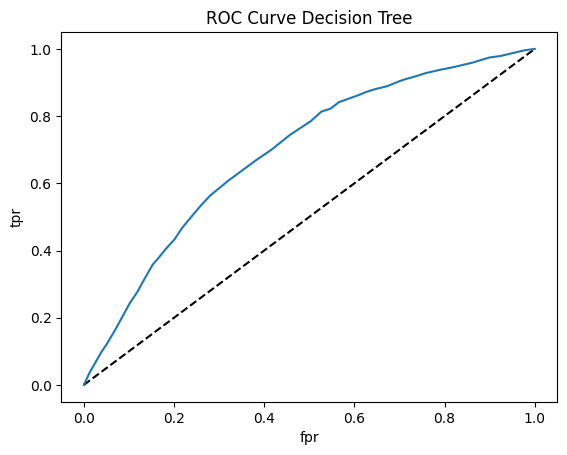

In [40]:
x_train, x_test, y_train, y_test = train_test_split(onehot, labels, test_size=0.2)
clf.fit(x_train, y_train)
y_predicted = clf.predict_proba(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:,1])

print(roc_auc_score(y_test, y_predicted[:,1]))

plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Decision Tree')
plt.show()

### KNN

The next model we decided to use to classify our data is KNN. We chose to use this model due to the simplicity of its implementation. However, we had to be mindful of how KNN can suffer if there is a class imbalance, so we again included SMOTE in our pipeline. KNN also suffers from the curse of dimensionality, which can be a problem, especially since we have over 60 features.

We first decided that we needed to determine the optimal number of neighbors for our KNN model. To do this, we ran a grid search on the parameter n_neighbors.

In [41]:
knn = KNeighborsClassifier()
scaler = StandardScaler(with_mean=False)
pipeline = imbpipeline(steps=[['scaler', scaler],['smote', SMOTE(random_state=42)], ['trunc', trunc], ['knn',knn]])

params = {
    'knn__n_neighbors'  : list(range(1, 25, 5))
}

# grid = GridSearchCV(pipeline, params, cv=5, verbose=4, error_score='raise')
# grid.fit(onehot, labels)

In [42]:
# print('best params found:', grid.best_params_)
# print('Accuracy: %.2f%%' % (grid.best_score_ * 100))

Through our grid search, we found that the optimal value for the n_neighbors parameter is 16. Using this information, we created our KNN classifier and ran a classification report. From the classification report, we noticed that the true recall is very low. The decision tree that we ran earlier had a true recall of 66% while KNN has a true recall of 33%. Because we want to maximize true recall since we decided that is most important, this classifier is not ideal. 

In [43]:
knn = KNeighborsClassifier(n_neighbors=16)
scaler = StandardScaler(with_mean=False)
pipeline = imbpipeline(steps=[['scaler', scaler],['smote', SMOTE(random_state=42)], ['trunc', trunc], ['knn',knn]])

filename = 'knn.sav'

try: 
    loaded_model = pickle.load(open(filename,'rb'))
    print('loaded model')
    y_predicted = cross_val_predict(loaded_model, onehot, labels, cv=5, verbose=2)
    print(classification_report(labels, y_predicted))

except (OSError, IOError) as e:
    pipeline.fit(onehot, labels)
    pickle.dump(pipeline, open(filename, 'wb'))
    y_predicted = cross_val_predict(pipeline, onehot, labels, cv=5, verbose=2)
    print(classification_report(labels, y_predicted))



loaded model
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s remaining:    0.0s
              precision    recall  f1-score   support

       False       0.77      0.75      0.76     27829
        True       0.30      0.31      0.31      9202

    accuracy                           0.64     37031
   macro avg       0.53      0.53      0.53     37031
weighted avg       0.65      0.64      0.65     37031

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


Next, we created a ROC curve for our KNN classifier. This ROC curve looks similar to the decision tree's ROC curve, however as we saw earlier, their recalls are very different. Based on the ROC curves and classification report, it seems like decision tree is a better classifier for our dataset than KNN.

0.6537161395032733


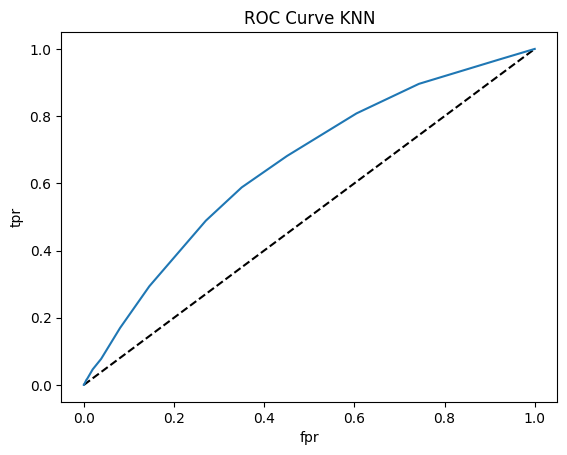

In [44]:
x_train, x_test, y_train, y_test = train_test_split(onehot, labels, test_size=0.2)
knn.fit(x_train, y_train)
y_predicted = knn.predict_proba(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:,1])

print(roc_auc_score(y_test, y_predicted[:,1]))

plt.plot([0,1],[0,1],'k--') 
plt.plot(fpr, tpr, label='NB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve KNN')
plt.show()

### Naive Bayes

The next classifier we decided to use was Naive Bayes. Some of the benefits of using Naive Bayes to classify records from our dataset included that it was fast and simple, and scaled well. One of the main complications with the data set was the large number of features we had to deal with, but Naive Bayes avoids problems with the curse of dimensionality. 

Again, we used SMOTE to handle issues with class imbalance, and printed out the classification report. While the recall, at 72%, was much closer to what we wanted than the other classifiers we've tested so far, the overall accuracy was 53%, making it barely better than random. 

In [45]:
bayes = GaussianNB()
pipeline = imbpipeline(steps=[['smote', SMOTE(random_state=42)], ['trunc', trunc], ['nb',bayes]])
filename = 'naive_bayes.sav'

try: 
    loaded_model = pickle.load(open(filename,'rb'))
    print('loaded model')
    y_predicted = cross_val_predict(loaded_model, onehot, labels, cv=5, verbose=2)
    print(classification_report(labels, y_predicted))

except (OSError, IOError) as e:
    pipeline.fit(onehot, labels)
    pickle.dump(pipeline, open(filename, 'wb'))
    y_predicted = cross_val_predict(pipeline, onehot, labels, cv=5, verbose=2)
    print(classification_report(labels, y_predicted))

loaded model
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s
              precision    recall  f1-score   support

       False       0.83      0.47      0.60     27829
        True       0.31      0.72      0.43      9202

    accuracy                           0.53     37031
   macro avg       0.57      0.59      0.51     37031
weighted avg       0.70      0.53      0.56     37031

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   39.5s finished


As seen in the ROC curve below, the accuracy for Naive Bayes is essentially random. The curve almost completely follows the slope of 1, making it indistinguishable from the default line. This is unfortunate, as the recall for this classifier seems to be much better than the others we've tried, being decision tree and KNN.

0.5011464302682805
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


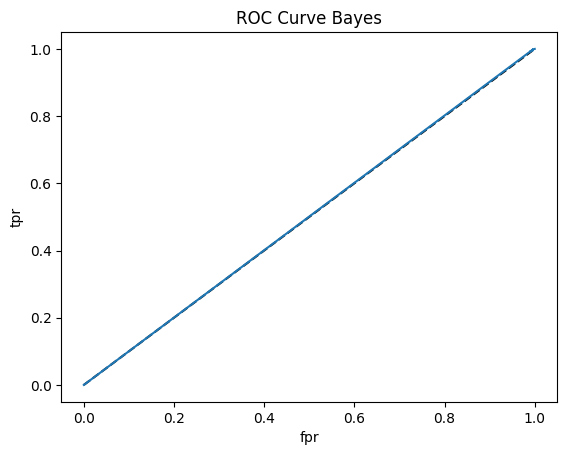

In [46]:
x_train, x_test, y_train, y_test = train_test_split(onehot, labels, test_size=0.2)
x_train = x_train.todense()
x_test = x_test.todense()

bayes.fit(x_train, y_train)
y_predicted = bayes.predict_proba(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:,1])

print(roc_auc_score(y_test, y_predicted[:,1]))

plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Bayes')
plt.show()

### Random Forest

As discussed in class, ensemble classifiers are good to use whenever the individual components do at least better than guessing. This is why we tried to use the Random Forest Classifier, as our decision trees from before were getting above 50% accuracy. Random Forest Classifiers use smaller decision trees, but uses many to provide the benefits of a tribunal. 

In [47]:
#rfc = RandomForestClassifier()
#parameters = {'rfc__n_estimators':(50,100,150)}
#pipeline = imbpipeline(steps=[['smote', SMOTE(random_state=42)], ['trunc', trunc], ['rfc',rfc]])
#gridsearch = GridSearchCV(pipeline, parameters, cv=5, verbose=2)
#gridsearch.fit(onehot,labels)

# print(classification_report(labels, y_predicted))

In [48]:
#print('best params found:', gridsearch.best_params_)
#print('Accuracy: %.2f%%' % (gridsearch.best_score_ * 100))

First, we needed to determine what the best number of estimators would be, using a grid search. This resulted in us having 100 classifiers. Similar to before, we used SMOTE and TruncatedSVD in our pipeline, and after running a cross validation loop, our classification report resulted in a 60% true recall, and an overall accuracy of 62%. While this is decent, it is similar to the rest of the models we have tried.

In [49]:
rfc = RandomForestClassifier(100)
pipeline = imbpipeline(steps=[['smote', SMOTE(random_state=42)], ['trunc', trunc], ['rfc',rfc]])
filename = 'rfc.sav'

try: 
    loaded_model = pickle.load(open(filename,'rb'))
    print('loaded model')
    y_predicted = cross_val_predict(loaded_model, onehot, labels, cv=5, verbose=2)
    print(classification_report(labels, y_predicted))

except (OSError, IOError) as e:
    pipeline.fit(onehot, labels)
    pickle.dump(pipeline, open(filename, 'wb'))
    y_predicted = cross_val_predict(pipeline, onehot, labels, cv=5, verbose=2)
    print(classification_report(labels, y_predicted))

loaded model
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.2s remaining:    0.0s
              precision    recall  f1-score   support

       False       0.83      0.63      0.72     27829
        True       0.35      0.60      0.44      9202

    accuracy                           0.62     37031
   macro avg       0.59      0.61      0.58     37031
weighted avg       0.71      0.62      0.65     37031

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.8min finished


As seen in the ROC curve below, we still have the same issues we have seen in our previous tests. 

0.6608928271550978


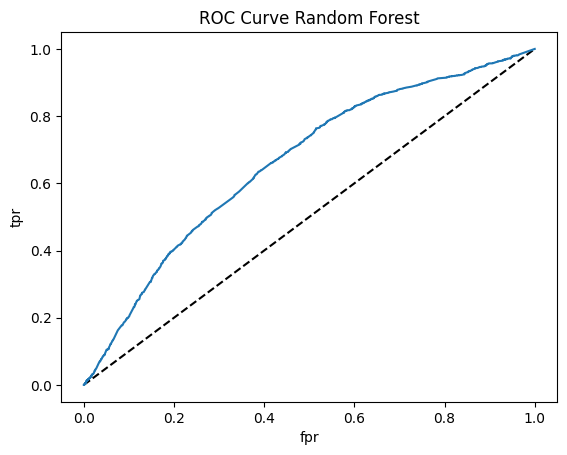

In [50]:
x_train, x_test, y_train, y_test = train_test_split(onehot, labels, test_size=0.2)

rfc.fit(x_train, y_train)
y_predicted = rfc.predict_proba(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:,1])

print(roc_auc_score(y_test, y_predicted[:,1]))

plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest')
plt.show()

### SVC

The next model we chose to run was SVCs, as they split data into two classes using a hyperplane, and we thought that this model could produce a better split of the data. Specifically, because SVC is a convex optimization problem, we know that will reach the optimal solution, while other classifiers (like decision trees) use a greedy solution and may not arrive at the optimal solution. In addition, SVCs are not susceptible to the curse of dimensionality, which is especially important because of the large number of features, and therefore dimensions, our dataset has. We first decided that we need to tune our hyperparameters, so we ran a grid search to determine the best SVC kernel to use for our model.

In [51]:
from sklearn.svm import SVC

svc = SVC()

parameter_grid = {
    'svc__kernel': ['linear', 'poly', 'rbf']
}

pipeline = imbpipeline([('scaler', scaler), ('trunc', trunc),('smote', SMOTE(random_state=42)), ('svc', svc)])

gridsearch = GridSearchCV(pipeline, parameter_grid, cv=5, verbose = 2)

In [52]:
#gridsearch.fit(onehot, labels)

In [53]:
#print('best params found:', gridsearch.best_params_)
#print('Accuracy: %.2f%%' % (gridsearch.best_score_ * 100))

Based on the results of the grid search, we discovered that the best SVC kernel was 'rbf'. Similar to before, we included SMOTE in our pipeline, and then ran a cross validation loop to generate our classification report. The accuracy of our SVM model is 60%, while the true recall is 72%. So far, these metrics seem somewhat better than our other models. 

In [0]:
svc = SVC(kernel='rbf')
pipeline = imbpipeline([('scaler', scaler), ('trunc', trunc),('smote', SMOTE(random_state=42)), ('svc', svc)])
filename = 'svc.sav'

try: 
    loaded_model = pickle.load(open(filename,'rb'))
    print('loaded model')
    y_predicted = cross_val_predict(loaded_model, onehot, labels, cv=5, verbose=2)
    print(classification_report(labels, y_predicted))

except (OSError, IOError) as e:
    pipeline.fit(onehot, labels)
    pickle.dump(pipeline, open(filename, 'wb'))
    y_predicted = cross_val_predict(pipeline, onehot, labels, cv=5, verbose=2)
    print(classification_report(labels, y_predicted))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.2min remaining:    0.0s
              precision    recall  f1-score   support

       False       0.86      0.56      0.68     27829
        True       0.35      0.72      0.47      9202

    accuracy                           0.60     37031
   macro avg       0.61      0.64      0.58     37031
weighted avg       0.73      0.60      0.63     37031

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 36.5min finished


Again, to visualize our model, we have generated a ROC curve. Despite the accuracy and true recall of this model being better than other models, its ROC curve is worse than our other models (like random forest, KNN, or decision trees). The ROC score represents the area under the curve, and because our score is around 0.56, that means that our SVC classifier has trouble distinguishing between classes. Despite the higher true recall, this is offset by the low true precision, causing the model to essentially be predicting if an accident is caused by drunk driving randomly.

0.5592776161646061


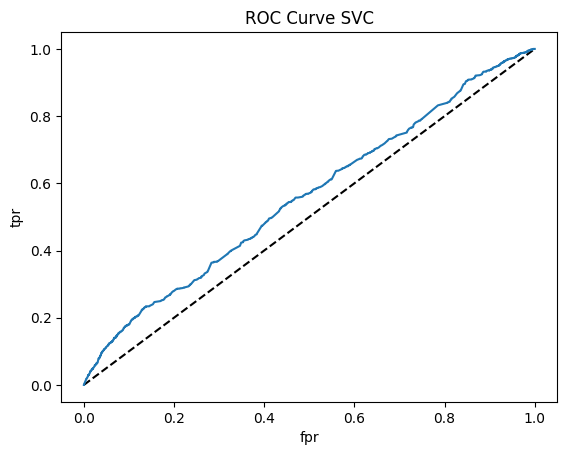

In [55]:
x_train, x_test, y_train, y_test = train_test_split(onehot, labels, test_size=0.2)
svc = SVC(kernel = 'rbf', probability=True)
svc.fit(x_train, y_train)
y_predicted = svc.predict_proba(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:,1])

print(roc_auc_score(y_test, y_predicted[:,1]))

plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve SVC')
plt.show()

### Neural Net

The last classifier we wanted to use is a Neural Net because it is capable of discovering complicated decision boundaries. However, this classifier can also overfit and get stuck at a local minima, and therefore not find the optimal solution. First, we used a grid search to determine the optimal solver for weight optimization in our neural net. 

In [56]:
from sklearn.neural_network import MLPClassifier
x_train, x_test, y_train, y_test = train_test_split(onehot, labels, test_size=0.2)
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf = MLPClassifier()
pipeline = imbpipeline([('scaler', scaler), ('smote', SMOTE(random_state=42)), ('clf', clf)])
clf.fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

parameter_grid = {
    'clf__solver': ['lbfgs', 'sgd', 'adam']
}

gridsearch = GridSearchCV(pipeline, parameter_grid, cv=5, verbose=2)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [57]:
#gridsearch.fit(onehot, labels)

In [58]:
#print('best params found:', gridsearch.best_params_) # best clf_solver = adam
#print('Accuracy: %.2f%%' % (gridsearch.best_score_ * 100)) # best accuracy = 61.89%

From the grid search results, we saw that the "adam" optimizer was the best parameter for solver. This makes sense because the "adam" optimizer is a stochastic gradient-based optimizer which is good for large datasets, like the one we are currently using. Like the previous models, we included Scalar and SMOTE in our pipeline to scale and reduce the class imbalance respectively. We then ran a cross validation loop to create a classification report for this model. The overall accuracy of the neural net is 61%, and its true recall is 64%. These metrics are slightly better than those from the other models we have generated.

In [59]:
adam = MLPClassifier(solver='adam')
pipeline = imbpipeline([('scaler', scaler), ('trunc', trunc),('smote', SMOTE(random_state=42)), ('adamn', adam)])
filename = 'neural_net.sav'

try: 
    loaded_model = pickle.load(open(filename,'rb'))
    print('loaded model')
    y_predicted = cross_val_predict(loaded_model, onehot, labels, cv=5, verbose=2)
    print(classification_report(labels, y_predicted))

except (OSError, IOError) as e:
    pipeline.fit(onehot, labels)
    pickle.dump(pipeline, open(filename, 'wb'))
    y_predicted = cross_val_predict(pipeline, onehot, labels, cv=5, verbose=2)
    print(classification_report(labels, y_predicted))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.7min remaining:    0.0s
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 39.3min finished
              precision    recall  f1-sc

Now, we have created a ROC curve of our neural net. The area under the curve is 0.678, which is better than most of the other models. This means that it is overall doing a better job in classifying drunk driving accidents correctly and differentiating the two classes. Compared to all the other models, neural nets seems to be the best model in terms of the ROC curve, accuracy, and true recall.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
0.6782097329255125


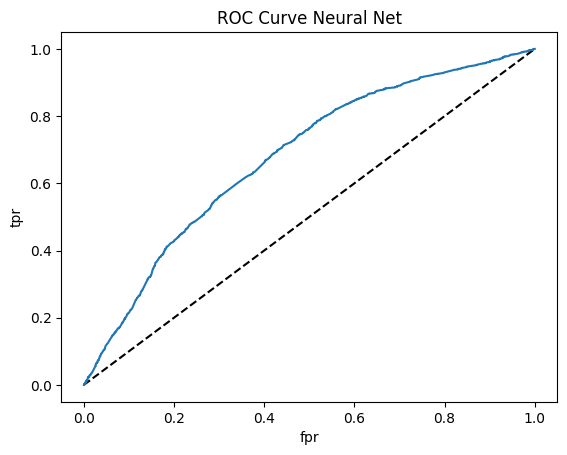

In [60]:
x_train, x_test, y_train, y_test = train_test_split(onehot, labels, test_size=0.2)
adam = MLPClassifier(solver='adam')
adam.fit(x_train, y_train)
y_predicted = adam.predict_proba(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:,1])

print(roc_auc_score(y_test, y_predicted[:,1]))

plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Neural Net')
plt.show()

## Outcome & Results

Each of the models reflected an accuracy around 60-65%. Each of them also heavily favored the negative class, as there is a 75-25% split between the False and True class. For our purposes, we wanted to consider with more importance the True class, as that was the class saying that drunk driver(s) were involved in the accident. Therefore, on each of our models, we used SMOTE, to undersample our False class and create synthetic data for our True class. After doing this our accuracy dropped from 75% to 60%. This makes sense, as our models were originally just classifying everything as False, leading to a misrepresentation of the model's success. Instead of focusing on overall accuracy, we decided to focus on just improving the recall for our True class, as that would be the percentage of drunk records that were properly classified as drunk. Here are our accuracies and recalls for all the models.

- Decision Tree: Accuracy: 62%, Recall: 58%, AUC: 0.693

- KNN: Accuracy: 65%, Recall: 31%, AUC: 0.654

- Naive Bayes: Accuracy: 53%, Recall: 72%, AUC: 0.501

- Random Forest: Accuracy: 62%, Recall: 60%, AUC: 0.661

- SVC: Accuracy: 60%, Recall: 72%, AUC: 0.559

- Neural Net: Accuracy: 61%, Recall: 64%, AUC: 0.678

As we can see from the above results, the models vary widely in terms of recall, ranging from 31% (KNN) to 72% (Naive Bayes & SVC). It is clear that there is somewhat of a tradeoff between accuracy and recall, but in terms of overall results, we found Neural Net to be one of the best models. Despite it not having the highest accuracy or recall, we also took into consideration the ROC score (area under the curve) as a metric, and the Neural Net classifier was most consistent across the board. Even so, none of our classifiers did quite as well as we had hoped, as in any of the situations, our model will still miss a significant proportion of fatal accidents that involve drunk drivers.

## Conclusion

Before we formalize our conclusion, we will go through a brief overview of our thinking and processes. 

After taking a look at the dataset, we decided that we wanted to predict whether a fatal accident involved a drunk driver based on other features in the dataset, such as light conditions, weather, and rural versus urban settings. While doing further exploration of the data, we discovered that only around 25% of the records involved a drunk driver, which is a clear class imbalance, and we kept this in mind for the future, because it is an important consideration for model building. We also created a variety of plots to visualize the data; we plotted the number of accidents per month, the number of accidents in various states, and even further analyzed how the number of accidents in a state compares to their total population. 

Then, after thoroughly exploring our dataset, we had to clean it and engineer the features for our problem. Initially, our dataset started off with 79 features, but we removed features that were essentially repeats (such as indexed vs named columns) or considered unnecessary for the question we were answering. In addition, we created boxplots to detect any outliers in our dataset, and removed those records accordingly.

We then spent a bit of time doing further feature creation, transformation, and dimensionality reduction. First, because our source had data separated into multiple csv files, there was no specific feature that recorded whether or not a drunk driver was involved in accident2021.csv, so we used a shared ID column with person2021.csv to create DRUNK_INV, a boolean value to represent the involvement of a drunk driver. Another step we took was one-hot encoding the relevant categorical features. This took us from 8 features to 96, making it sparse, and we were unable to run PCA. To resolve this issue, we deliberately aggregated similar values into groups, and this reduced the number of features to 68. Then, we dropped all records that had 'Unknown' in any of their columns, because it would not have been viable to make predictions from unclear values, and they were it only 6% of the total dataset.

After establishing a cleaned and engineered dataset, we then began building and training models to classify records. We tested a total of six different classifiers, those being Decision Tree, KNN, Naive Bayes, Random Forest, SVC, and Neural Net. Each of the models has its strengths and weaknesses, which we explored in more detail earlier, but something we noticed in the bigger picture was that there were significant tradeoffs when improving certain metrics. Because our dataset had a class imbalance to begin with, our accuracy measure demonstrated the tendency of our models to predict false. After trying to improve the class imbalance, the overall accuracy largely decreased. This means that our models were overpredicting false, so when more true records were added, the accuracy decreased. Another issue we noticed throughout the modeling and training process was an inability to improve on both precision and recall, so we prioritized maintaining a consistent accuracy while increasing recall. While we were able to improve recall a significant amount using models such as SVC and Naive Bayes, this resulted in extremely poor ROC curves, demonstrating a weakness in classifying records accurately and completely. 

Based on the analysis of our models using the accuracy and recall metrics, we have come to the conclusion that the features obtained at the time of impact are not effective predictors of if an accident involved a drunk driver. Although we initially thought that a model based on these features would result in a relatively high accuracy, throughout our process of modeling and training, we have observed that it is difficult to achieve classification of most drunk involvements as true (recall) while also minimizing the number of non-drunk involvements being classified as true (precision). While a glance at accuracy would make it seem like our classifiers have an adequate success rate, the discrepancies that lie beneath them undermine their effectiveness. Therefore, we have concluded that it would not be practical to use this set of features in a real-world situation to predict the involvement of drunk drivers in fatal motor vehicle accidents.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8978cf63-1b3a-44f5-abba-eb9c1d9f8f7e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>